# R Template

This notebook is a template for SolveBio R examples.

## Install and Load Packages

In [ ]:
packages = c("solvebio")

install_if_missing = function(p) {
  if (p %in% rownames(installed.packages()) == FALSE) {
    message(paste0("Installing ", p, "..."))
    invisible(install.packages(p, repos = 'http://cran.us.r-project.org', dependencies = TRUE))
  }
}

# Install
message("Installing missing packages...")
invisible(sapply(packages, install_if_missing))
message("Done installing packages!")

# Load
message("Loading packages...")
invisible(lapply(packages, require, character.only = TRUE))
message("Done loading packages!")

## Log-in to SolveBio

You'll need your SolveBio API key to run this notebook. You can get your API key from your [Security Settings](https://my.solvebio.com/settings/security).

In [ ]:
solvebio::login("Your API key here")

## Example: Get the top genes in ClinVar

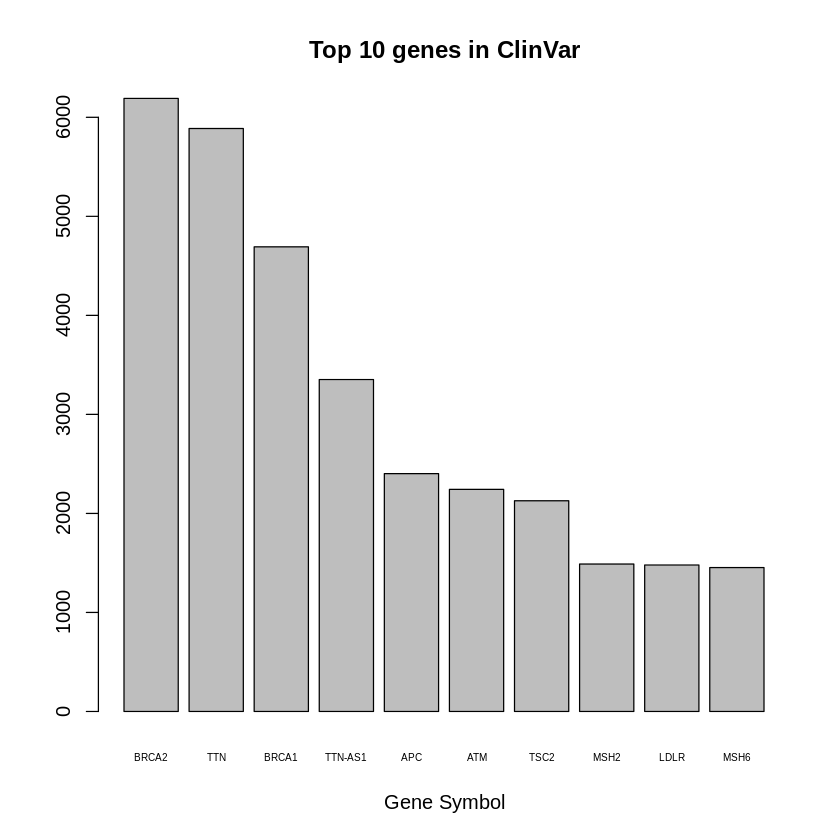

In [89]:
clinvar <- Dataset.get_by_full_path("solveBio:public:/ClinVar/3.7.4-2017-01-30/Combined-GRCh37")
facets <- Dataset.facets(id = ClinVar$id, facets = list("gene_symbol"))

# Convert the facets response into a dataframe, ensure count is numeric.
gene_symbols <- as.data.frame(facets$gene_symbol, stringsAsFactors = FALSE)
names(gene_symbols) <- c("gene", "count")
gene_symbols$count <- as.numeric(gene_symbols$count)

# Plot the counts
barplot(gene_symbols$count, names.arg = gene_symbols$gene,
        main = "Top 10 genes in ClinVar", xlab = "Gene Symbol", cex.names = 0.5)